In [7]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.patheffects as path_effects


from IPython.display import HTML
import re
import datetime as dt
import numpy as np
import imp

import baltic as bt
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.lines as mlines
import time
from io import StringIO
import altair as alt
import numpy as np
from zipfile import ZipFile
from datetime import datetime

In [48]:
typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22



def convertDate(x, start_format, end_format):
    """ Converts calendar dates between given formats """
    return datetime.strptime(x, start_format).strftime(end_format)

def hpd(data, level):
    """
    Return highest posterior density interval from a list,
    given the percent posterior density interval required.
    """
    d = list(data)
    d.sort()

    nData = len(data)
    nIn = int(round(level * nData))
    if nIn < 2 :
        return None
    #raise RuntimeError("Not enough data. N data: %s"%(len(data)))
 
    i = 0
    r = d[i+nIn-1] - d[i]
    for k in range(len(d) - (nIn - 1)) :
        rk = d[k+nIn-1] - d[k]
        if rk < r :
            r = rk
            i = k

    assert 0 <= i <= i+nIn-1 < len(d)
 
    return (d[i], d[i+nIn-1])

clist=[(0.0,'#C0C0C0'),
       (0.5,'grey'),
       (1.0,'#16166F')]

location_cmap = mpl.colors.LinearSegmentedColormap.from_list('mycmap',clist)

In [42]:
tree12=bt.loadNexus('../../../../Desktop/DTA_rerun/MPOX-skd-DTA.mcc.tree', absoluteTime = True)
tree12.setAbsoluteTime(2023.4109589041095)
branchWidth=10.75

In [43]:
for k in tree12.Objects:
    if "location.set" not in k.traits:
        k.traits.update({'location.set': []})
    if "location" not in k.traits:
        k.traits.update({'location': []})
    if k.traits['location'] == []:
        k.traits.update({'location': 'none'})

In [16]:
#for k in tree12.Objects:
     #   print(k.traits)

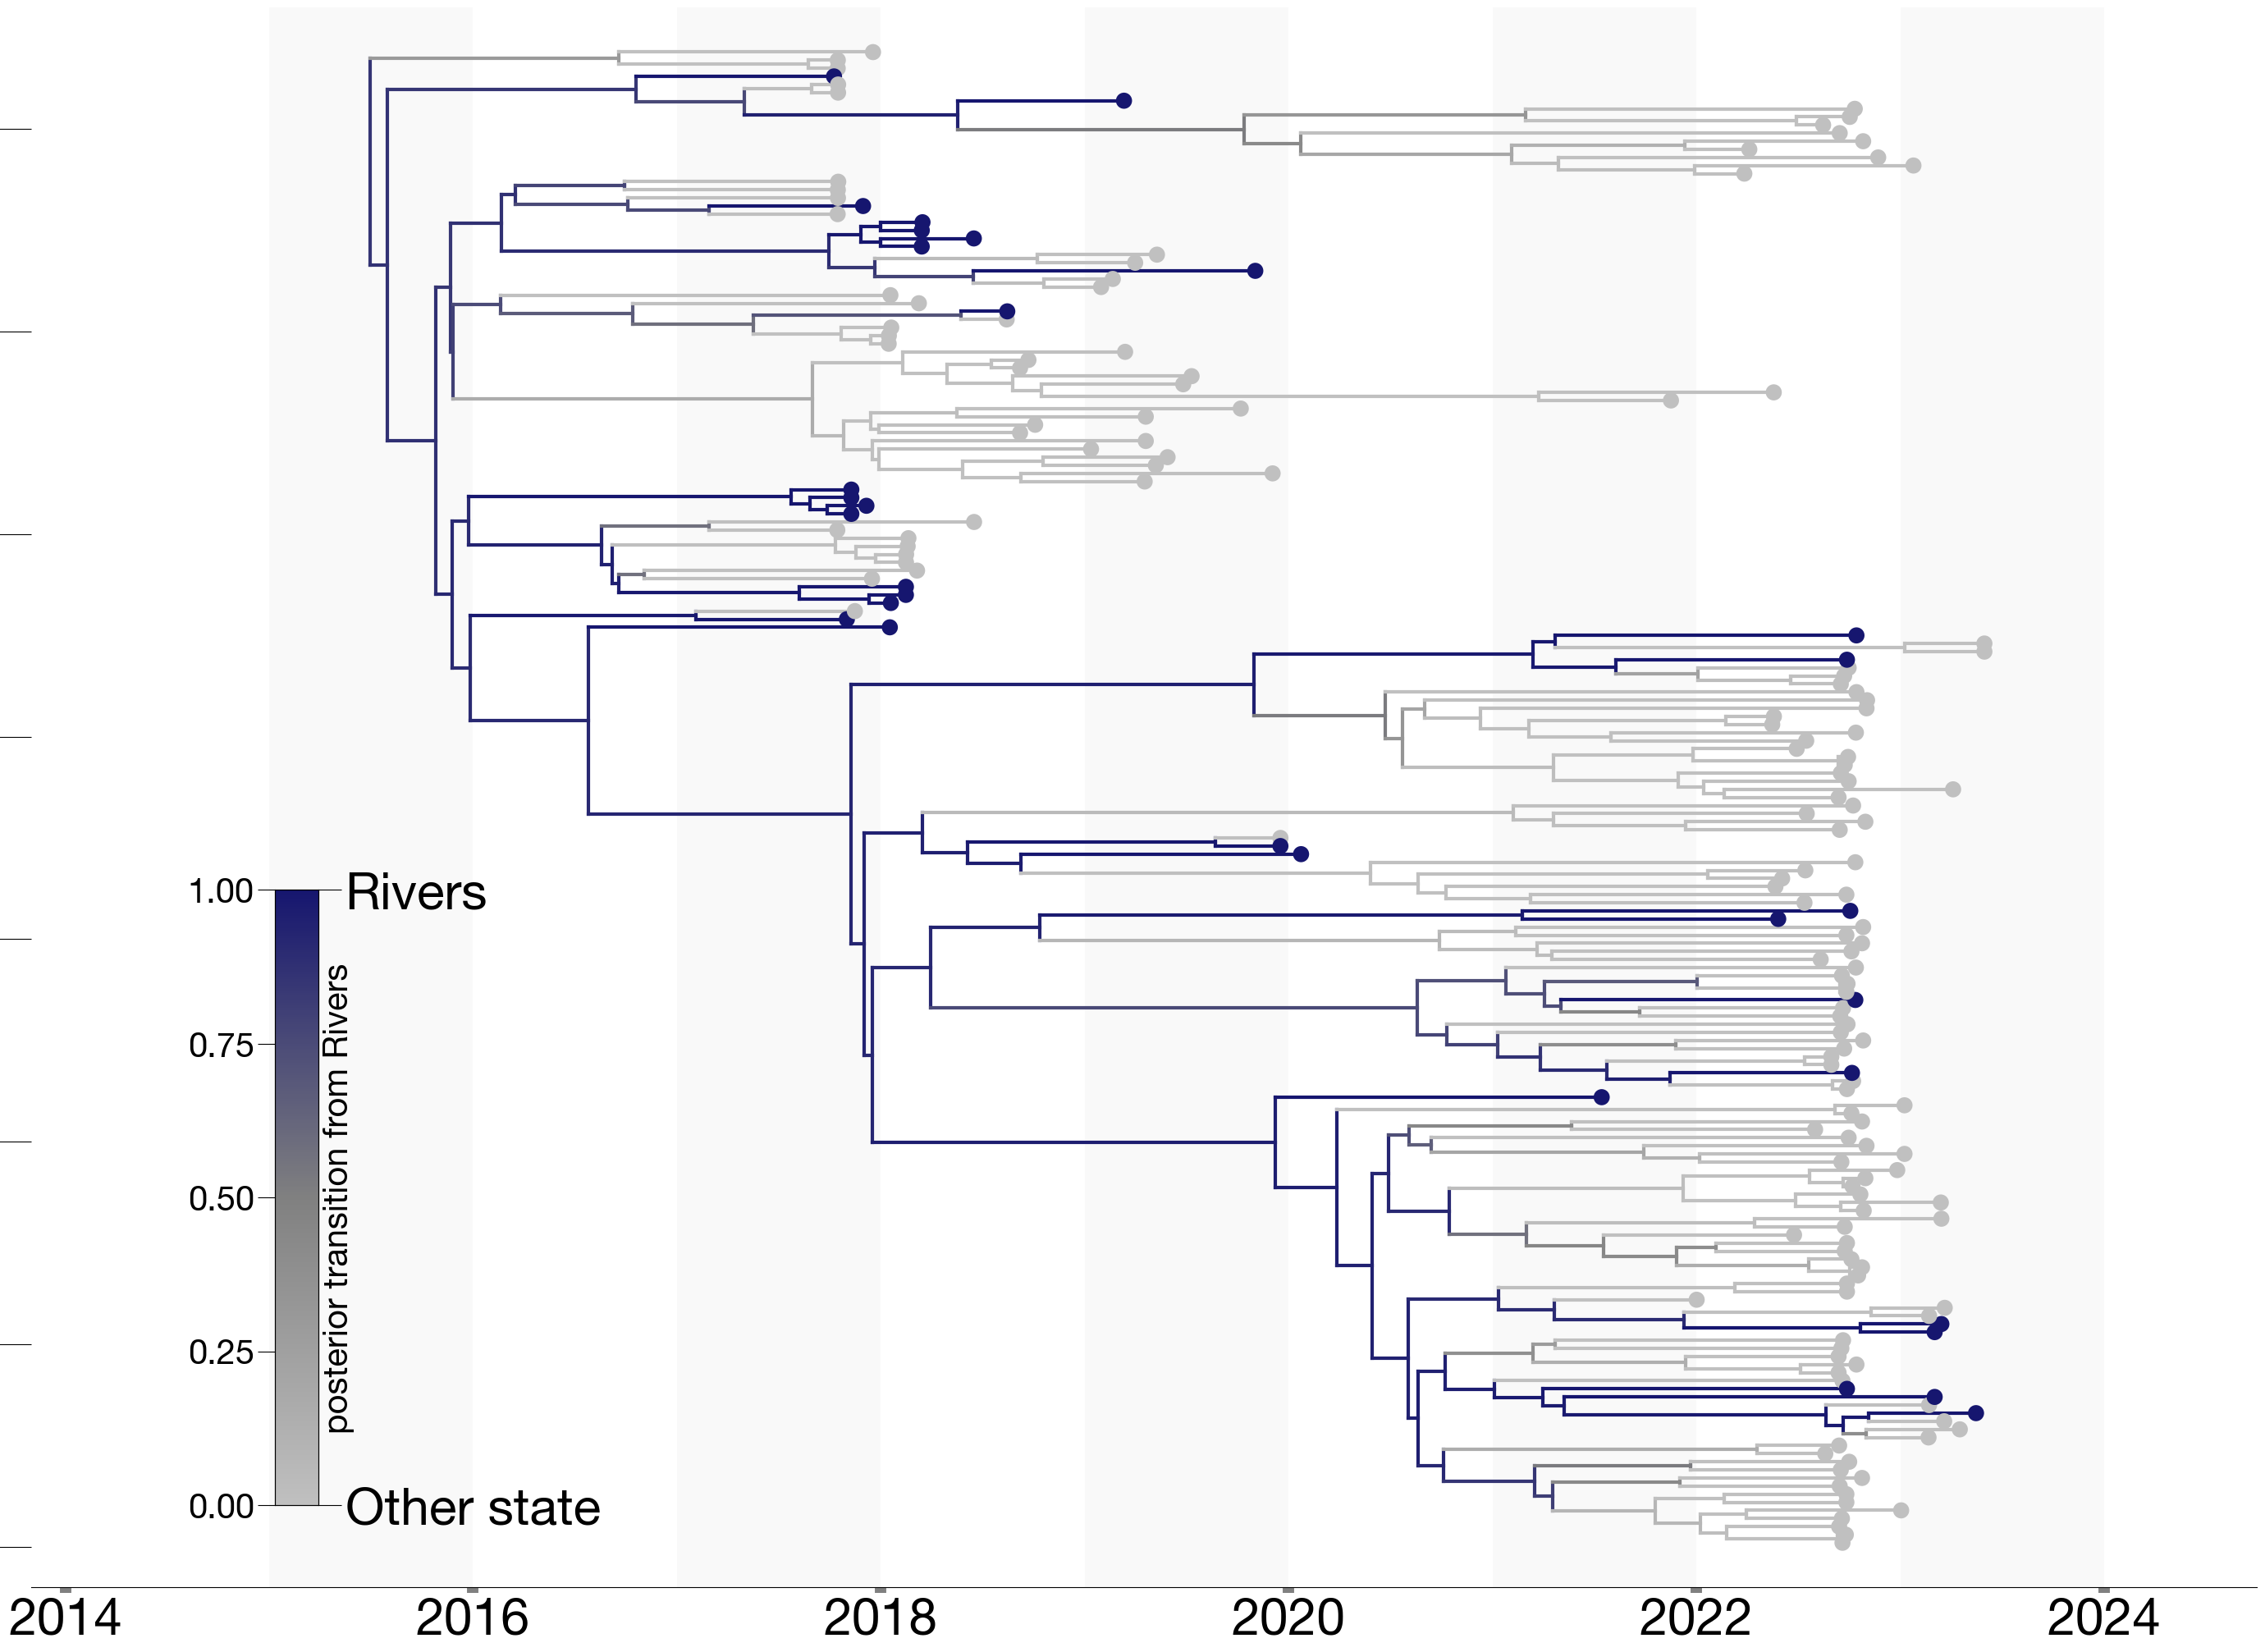

In [71]:
fig,ax = plt.subplots(figsize=(35,25),facecolor='w')


tipSize = 500
# Drawing transparent interval lines every 5 years on the X-axis
min_year = 2014
max_year = 2024
  
year_ticks=[]
for i,year in enumerate(range(min_year, max_year + 1, 1)):  # Adjusted here for a year intervalvi used one here
    if i%2==1: # checks if index is even (remainder after dividing by two is 0)
        ax.axvspan(year,year+1,fc='k',ec='none',alpha=0.025)
    year_ticks.append(year)

order=[k.name for k in tree12.traverse_tree()]

skip=0
branchWidth=3
types=['h','c']

for k in tree12.Objects:
    c='k'
    if 'Rivers' in k.traits['location.set']:
        hidx=k.traits['location.set'].index('Rivers')
        c=location_cmap(k.traits['location.set.prob'][hidx])
    else:
        c=location_cmap(0.0)

    z=1
    if k.traits['location']=='':
        z=2

    x=k.absoluteTime
    y=k.y

    xp=k.parent.absoluteTime
    if xp==0:
        xp=x
        
        
    
    if k.branchType=='leaf':
        ax.scatter(x,y,s=200,facecolor=c,edgecolor='none',zorder=4)
        ax.scatter(x,y,s=50,facecolor='black',edgecolor='none',zorder=3)
    else:
        yl=k.children[0].y+skip
        yr=k.children[-1].y+skip
        ax.plot([x,x],[yl,yr],color=c,lw=branchWidth,zorder=z)
        
    if "Rivers" in k.parent.traits and k.traits['location']!=k.parent.traits['location']:
        if 'Rivers' in k.parent.traits['location.set']:
            hidx=k.parent.traits['location.set'].index('Rivers')
            c=location_cmap(k.parent.traits['location.set.prob'][hidx])
        ax.plot([x,xp],[y,y],color=c,lw=branchWidth,zorder=z-1)
    else:
        ax.plot([x,xp],[y,y],color=c,lw=branchWidth,zorder=z)
    
    
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

ax.tick_params(size=50, labelsize=45)
#ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(bt.decimalDate('2013-11-01'),bt.decimalDate('2024-10-01'))
ax.set_ylim(-5,tree12.ySpan+5)

ax2 = fig.add_axes([0.21, 0.15, 0.015, 0.3])
mpl.colorbar.ColorbarBase(ax2, cmap=location_cmap,ticks=np.linspace(0.0,1.0,5))
ax2.tick_params(size=15,labelsize=30)
ax.tick_params(axis='x', size=5, width=10, color='grey', rotation=0)

ax2.set_ylabel('posterior transition from Rivers',size=30)
ax3=ax2.twinx()
ax3.set_ylim(0,1)
ax3.set_yticks([0.0,1.0])
ax3.set_yticklabels(['Other state','Rivers'], fontweight="bold")
ax3.tick_params(size=20,labelsize=45)
plt.savefig('../../../../Desktop/DTA_rerun/MPOX_Rivers.png',dpi=300,bbox_inches='tight')
plt.savefig('../../../../Desktop/DTA_rerun/MPOX_Rivers_mcc.svg',dpi=300,bbox_inches='tight')
plt.show()

In [29]:
bt_Helper